In [9]:
from google.colab import files
uploaded = files.upload()



Saving ml-100k.zip to ml-100k (2).zip


In [2]:
import zipfile
import os

zip_file = 'ml-100k.zip'
extract_dir = 'ml-100k'
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List all files and directories recursively
for root, dirs, files in os.walk(extract_dir):
    for name in files:
        print(os.path.join(root, name))



ml-100k\ml-100k\allbut.pl
ml-100k\ml-100k\mku.sh
ml-100k\ml-100k\README
ml-100k\ml-100k\u.data
ml-100k\ml-100k\u.genre
ml-100k\ml-100k\u.info
ml-100k\ml-100k\u.item
ml-100k\ml-100k\u.occupation
ml-100k\ml-100k\u.user
ml-100k\ml-100k\u1.base
ml-100k\ml-100k\u1.test
ml-100k\ml-100k\u2.base
ml-100k\ml-100k\u2.test
ml-100k\ml-100k\u3.base
ml-100k\ml-100k\u3.test
ml-100k\ml-100k\u4.base
ml-100k\ml-100k\u4.test
ml-100k\ml-100k\u5.base
ml-100k\ml-100k\u5.test
ml-100k\ml-100k\ua.base
ml-100k\ml-100k\ua.test
ml-100k\ml-100k\ub.base
ml-100k\ml-100k\ub.test


In [3]:
import os

# List all files and directories in the top-level directory
files = os.listdir(extract_dir)
print('Top-level files and directories:', files)

# If needed, check within subdirectories
for subdir in files:
    subdir_path = os.path.join(extract_dir, subdir)
    if os.path.isdir(subdir_path):
        sub_files = os.listdir(subdir_path)
        print(f'Contents of {subdir_path}:', sub_files)




Top-level files and directories: ['ml-100k']
Contents of ml-100k\ml-100k: ['allbut.pl', 'mku.sh', 'README', 'u.data', 'u.genre', 'u.info', 'u.item', 'u.occupation', 'u.user', 'u1.base', 'u1.test', 'u2.base', 'u2.test', 'u3.base', 'u3.test', 'u4.base', 'u4.test', 'u5.base', 'u5.test', 'ua.base', 'ua.test', 'ub.base', 'ub.test']


In [4]:
import os

# List all files and directories in the extraction directory
for root, dirs, files in os.walk('ml-100k'):
    for name in files:
        print(os.path.join(root, name))


ml-100k\ml-100k\allbut.pl
ml-100k\ml-100k\mku.sh
ml-100k\ml-100k\README
ml-100k\ml-100k\u.data
ml-100k\ml-100k\u.genre
ml-100k\ml-100k\u.info
ml-100k\ml-100k\u.item
ml-100k\ml-100k\u.occupation
ml-100k\ml-100k\u.user
ml-100k\ml-100k\u1.base
ml-100k\ml-100k\u1.test
ml-100k\ml-100k\u2.base
ml-100k\ml-100k\u2.test
ml-100k\ml-100k\u3.base
ml-100k\ml-100k\u3.test
ml-100k\ml-100k\u4.base
ml-100k\ml-100k\u4.test
ml-100k\ml-100k\u5.base
ml-100k\ml-100k\u5.test
ml-100k\ml-100k\ua.base
ml-100k\ml-100k\ua.test
ml-100k\ml-100k\ub.base
ml-100k\ml-100k\ub.test


In [5]:
import pandas as pd

# Correct paths based on the output of the directory listing
data_file = 'ml-100k/ml-100k/u.data'
item_file = 'ml-100k/ml-100k/u.item'
user_file = 'ml-100k/ml-100k/u.user'

df_data = pd.read_csv(data_file, sep='\t', header=None, names=['user_id', 'item_id', 'rating', 'timestamp'])
df_item = pd.read_csv(item_file, sep='|', header=None, encoding='latin-1', names=['item_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])
df_user = pd.read_csv(user_file, sep='|', header=None, encoding='latin-1', names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])



In [6]:
# Merge df_data with df_item
df_merged = pd.merge(df_data, df_item, on='item_id', how='left')

# Merge the resulting DataFrame with df_user
df_merged = pd.merge(df_merged, df_user, on='user_id', how='left')


In [7]:
# Display the first few rows of the merged DataFrame
df_merged.head()


,user_id,item_id,rating,timestamp,title,release_date,video_release_date,IMDb_URL,unknown,Action,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip_code
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,49,M,writer,55105
1,186,302,3,891717742,L.A. Confidential (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,...,1,0,0,1,0,0,39,F,executive,00000
2,22,377,1,878887116,Heavyweights (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,...,0,0,0,0,0,0,25,M,writer,40206
3,244,51,2,880606923,Legends of the Fall (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,...,0,1,0,0,1,1,28,M,technician,80525
4,166,346,1,886397596,Jackie Brown (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,...,0,0,0,0,0,0,47,M,educator,55113


In [8]:
df_merged.to_csv('merged_data.csv', index=False)


In [9]:
#Q1.
# Check column names in df_item
print(df_item.columns)
import seaborn as sns
import matplotlib.pyplot as plt

# Correctly identify genre columns
genre_columns = df_item.columns[5:]  # Adjust this based on your DataFrame structure

# Ensure genre columns are included and have correct names
print(genre_columns)
# Check the columns in df_merged to ensure they match genre_columns
print(df_merged.columns)
print(genre_columns)




Index(['item_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL',
       'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')
Index(['unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')
Index(['user_id', 'item_id', 'rating', 'timestamp', 'title', 'release_date',
       'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure',
       'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'age', 'gender', 'occupation',
       'zip_code'],
    

In [10]:
# Check the structure of genre_avg_rating before renaming columns
print(genre_avg_rating.head())
print(genre_avg_rating.columns)




Empty DataFrame
Columns: []
Index: []
Index([], dtype='object')


In [11]:
print(genre_avg_rating.head())
print(genre_avg_rating.columns)


Empty DataFrame
Columns: []
Index: []
Index([], dtype='object')


In [12]:
print(df_merged.shape)
print(df_merged.head())



(100000, 31)
   user_id  item_id  rating  timestamp                       title  \
0      196      242       3  881250949                Kolya (1996)   
1      186      302       3  891717742    L.A. Confidential (1997)   
2       22      377       1  878887116         Heavyweights (1994)   
3      244       51       2  880606923  Legends of the Fall (1994)   
4      166      346       1  886397596         Jackie Brown (1997)   

  release_date  video_release_date  \
0  24-Jan-1997                 NaN   
1  01-Jan-1997                 NaN   
2  01-Jan-1994                 NaN   
3  01-Jan-1994                 NaN   
4  01-Jan-1997                 NaN   

                                            IMDb_URL  unknown  Action  ...  \
0    http://us.imdb.com/M/title-exact?Kolya%20(1996)        0       0  ...   
1  http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...        0       0  ...   
2  http://us.imdb.com/M/title-exact?Heavyweights%...        0       0  ...   
3  http://us.imdb.com/M/t

In [13]:
print(df_merged.columns)


Index(['user_id', 'item_id', 'rating', 'timestamp', 'title', 'release_date',
       'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure',
       'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'age', 'gender', 'occupation',
       'zip_code'],
      dtype='object')


In [14]:
print(df_merged[['user_id', 'item_id', 'rating', 'title', 'gender', 'Action']].head())


   user_id  item_id  rating                       title gender  Action
0      196      242       3                Kolya (1996)      M       0
1      186      302       3    L.A. Confidential (1997)      F       0
2       22      377       1         Heavyweights (1994)      M       0
3      244       51       2  Legends of the Fall (1994)      M       0
4      166      346       1         Jackie Brown (1997)      M       0


In [15]:
print(genre_avg_rating.shape)



(0, 0)


In [16]:
ratings = pd.read_csv('ml-100k/ml-100k/u.data',delimiter='\t',header=None,
                      names=['user','movie_id','rating','timestamp'])
movies = pd.read_csv('ml-100k/ml-100k/u.item',delimiter='|',header=None,encoding = 'latin-1',usecols=(0,1),names=['movie_id','movie_title'])
users = pd.read_csv('ml-100k/ml-100k/u.user',delimiter='|',header=None,names=['user_id','age','gender','occupation','zip_code'])
genres = pd.read_csv('ml-100k/ml-100k/u.genre',delimiter='|',header=None,usecols=(0,0),names=['genre_name'])

In [17]:
import pandas as pd

# File paths
data_file = 'ml-100k/ml-100k/u.data'
item_file = 'ml-100k/ml-100k/u.item'
user_file = 'ml-100k/ml-100k/u.user'

# Load the data into DataFrames
df_data = pd.read_csv(data_file, sep='\t', header=None, names=['user_id', 'item_id', 'rating', 'timestamp'])
df_item = pd.read_csv(item_file, sep='|', header=None, encoding='latin-1',
                      names=['item_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action',
                             'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
                             'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])
df_user = pd.read_csv(user_file, sep='|', header=None, encoding='latin-1',
                      names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])



In [18]:
# Merge df_data with df_item on 'item_id'
df_merged = pd.merge(df_data, df_item, on='item_id')

# Merge the result with df_user on 'user_id'
df_merged = pd.merge(df_merged, df_user, on='user_id')

# Now df_merged contains all the information from u.data, u.item, and u.user


In [19]:
# Display the first few rows of the merged DataFrame
print(df_merged.head())

# Check the columns of the merged DataFrame
print(df_merged.columns)


   user_id  item_id  rating  timestamp  \
0      196      242       3  881250949   
1      196      257       2  881251577   
2      196      111       4  881251793   
3      196       25       4  881251955   
4      196      382       4  881251843   

                                               title release_date  \
0                                       Kolya (1996)  24-Jan-1997   
1                                Men in Black (1997)  04-Jul-1997   
2                Truth About Cats & Dogs, The (1996)  26-Apr-1996   
3                               Birdcage, The (1996)  08-Mar-1996   
4  Adventures of Priscilla, Queen of the Desert, ...  01-Jan-1994   

   video_release_date                                           IMDb_URL  \
0                 NaN    http://us.imdb.com/M/title-exact?Kolya%20(1996)   
1                 NaN  http://us.imdb.com/M/title-exact?Men+in+Black+...   
2                 NaN  http://us.imdb.com/M/title-exact?Truth%20About...   
3                 NaN  http:

In [20]:
genre_file = 'ml-100k/ml-100k/u.genre'

In [21]:
df_genre = pd.read_csv(genre_file, sep='|', header=None, names=['genre', 'genre_id'])

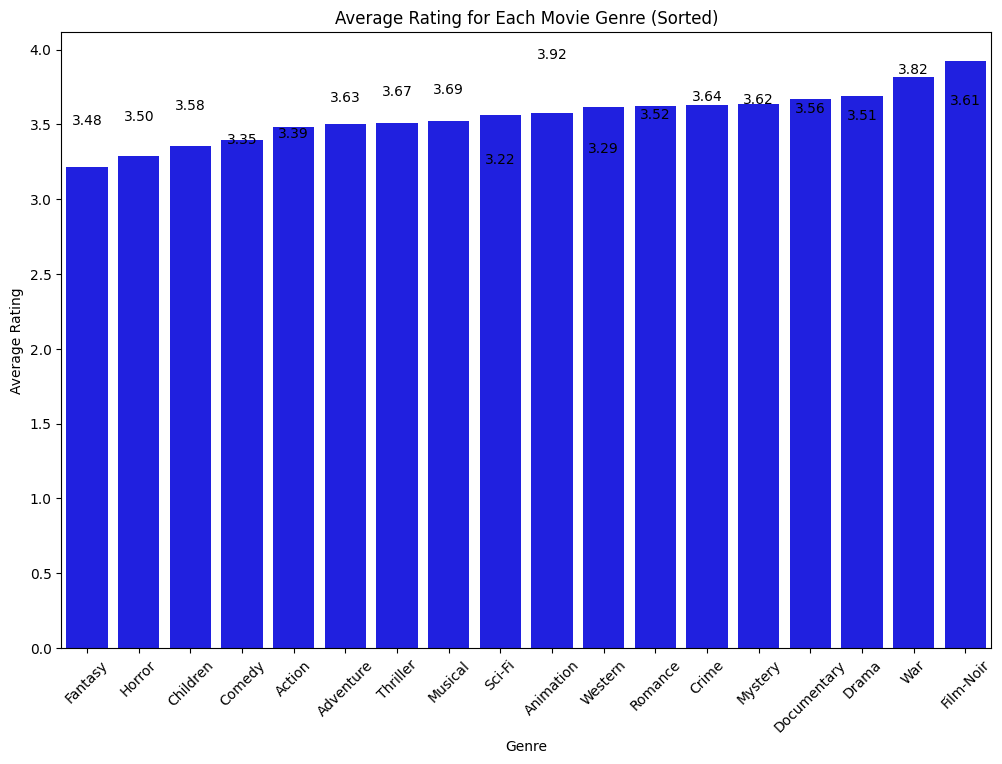

In [75]:
#Q1.What is the average rating for each movie genre?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the genre columns, excluding 'unknown'
genre_columns = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
                 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
                 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Calculate the average rating for each genre, excluding 'unknown'
genre_avg_rating = pd.DataFrame()

for genre in genre_columns:
    # Calculate the average rating for each genre
    genre_avg_rating[genre] = df_merged[df_merged[genre] == 1].groupby(genre)['rating'].mean()

# Transpose the DataFrame for better readability
genre_avg_rating = genre_avg_rating.T
genre_avg_rating.columns = ['Average Rating']

# Reset index to get genres as a column
genre_avg_rating = genre_avg_rating.reset_index().rename(columns={'index': 'Genre'})

# Sort the DataFrame by the 'Average Rating' in ascending order
genre_avg_rating = genre_avg_rating.sort_values(by='Average Rating', ascending=True)

# Plot the average ratings for each genre as a vertical bar chart
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=genre_avg_rating, x='Genre', y='Average Rating', color='blue')

# Add labels exactly on top of each bar
for index, row in genre_avg_rating.iterrows():
    barplot.text(
        index,  # X-coordinate: position of the bar
        row['Average Rating'],  # Y-coordinate: exactly on top of the bar
        f'{row["Average Rating"]:.2f}',  # Label text: average rating rounded to 2 decimal places
        color='black',  # Text color
        ha="center",  # Horizontal alignment: center with the bar
        va="bottom",  # Vertical alignment: bottom to ensure the label is on top
        fontsize=10  # Font size
    )

plt.title('Average Rating for Each Movie Genre (Sorted)')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()






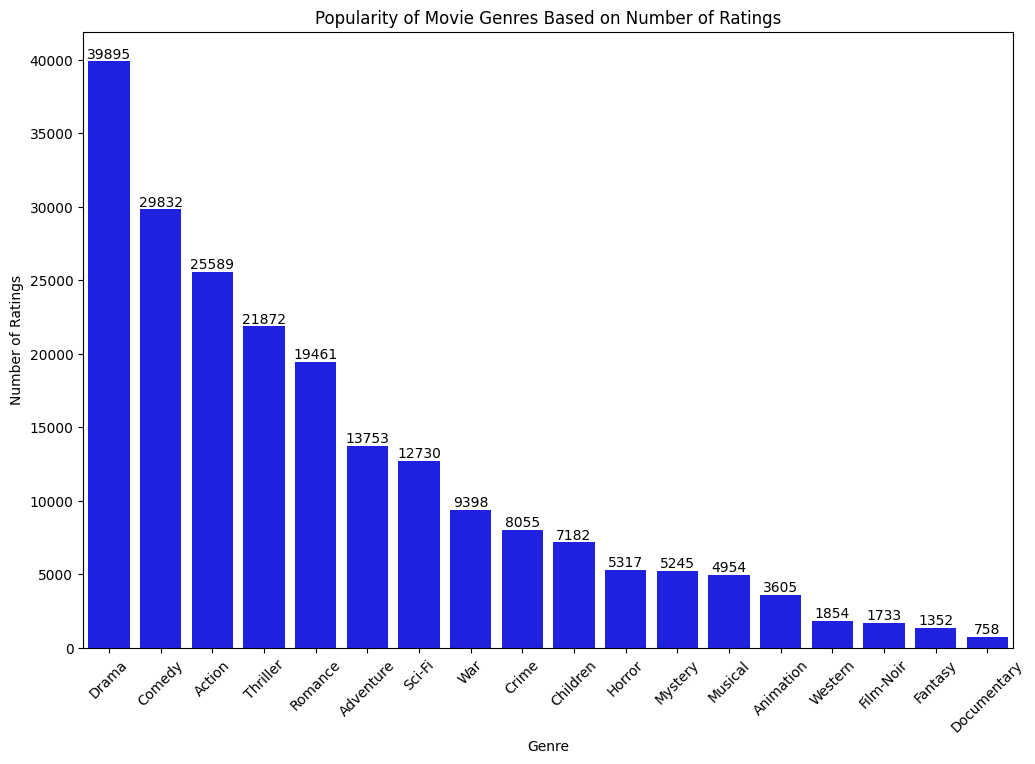

In [27]:
#Q2.Which genres are the most popular based on the number of ratings received?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the genre columns, excluding 'unknown'
genre_columns = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
                 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
                 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Calculate the total number of ratings for each genre
genre_popularity = pd.DataFrame()

for genre in genre_columns:
    # Count the number of ratings for each genre
    genre_popularity[genre] = [df_merged[df_merged[genre] == 1].shape[0]]

# Transpose the DataFrame for better readability
genre_popularity = genre_popularity.T
genre_popularity.columns = ['Number of Ratings']

# Reset index to get genres as a column
genre_popularity = genre_popularity.reset_index().rename(columns={'index': 'Genre'})

# Sort by the number of ratings
genre_popularity = genre_popularity.sort_values(by='Number of Ratings', ascending=False)

# Plot the number of ratings for each genre using a single color
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=genre_popularity, x='Genre', y='Number of Ratings', color='blue')

# Add labels on top of each bar, positioned correctly using the patches attribute
for i, bar in enumerate(barplot.patches):
    barplot.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate: center of the bar
        bar.get_height(),  # Y-coordinate: top of the bar
        f'{int(bar.get_height())}',  # Label text: height of the bar
        ha='center',  # Horizontal alignment: center
        va='bottom',  # Vertical alignment: bottom of the text aligns with top of the bar
        fontsize=10,  # Font size
        color='black'  # Text color
    )

plt.title('Popularity of Movie Genres Based on Number of Ratings')
plt.xlabel('Genre')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()



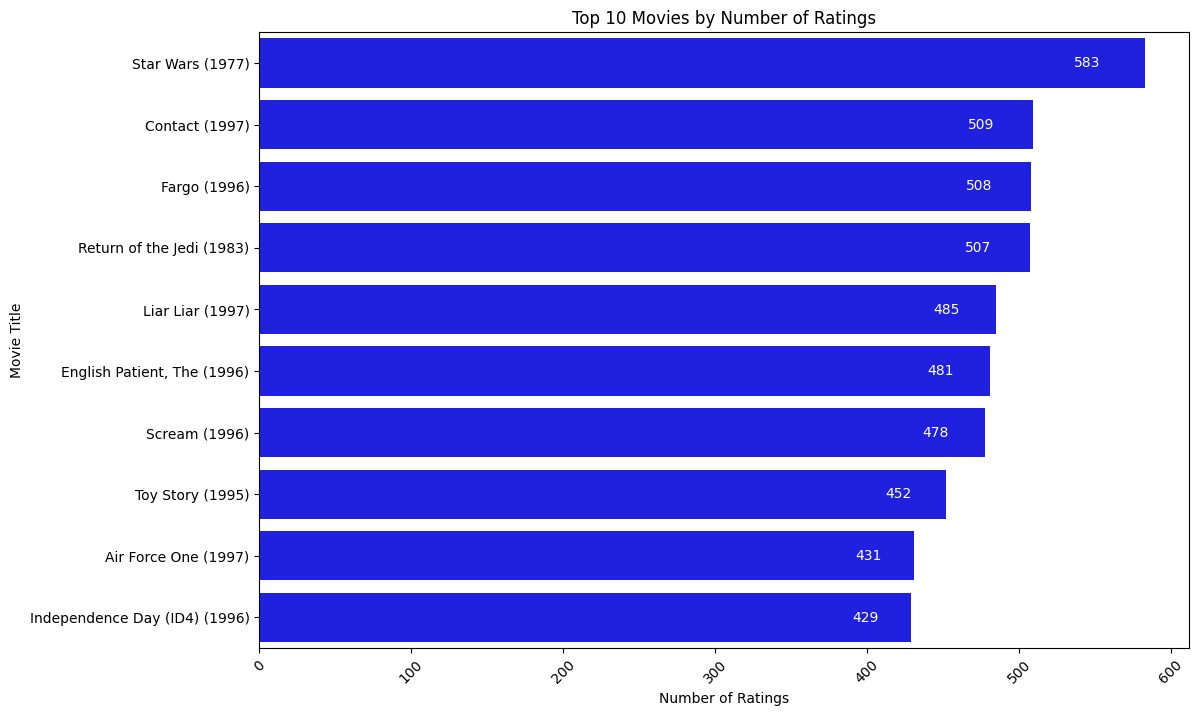

In [33]:
#Q3.Which movies (Top-10) have received the highest number of ratings?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by movie title and count the number of ratings
movie_rating_counts = df_merged.groupby('title').size().reset_index(name='Number of Ratings')

# Sort by the number of ratings in descending order and get the top 10 movies
top_10_movies = movie_rating_counts.sort_values(by='Number of Ratings', ascending=False).head(10)

# Plot the top 10 movies by number of ratings using a single color
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=top_10_movies, x='Number of Ratings', y='title', color='blue')

# Add labels inside each bar indicating the number of ratings
for patch in barplot.patches:
    width = patch.get_width()  # Width of each bar
    barplot.text(
        width - (width * 0.05),  # X-coordinate: slight offset inside the bar
        patch.get_y() + patch.get_height() / 2,  # Y-coordinate: center of the bar
        f'{int(width)}',  # Label text: number of ratings
        color='white',  # Text color
        va="center",  # Vertical alignment: center with the bar
        ha="right",  # Horizontal alignment: right (positioned towards the end of the bar)
        fontsize=10  # Font size
    )

plt.title('Top 10 Movies by Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.xticks(rotation=45)
plt.show()




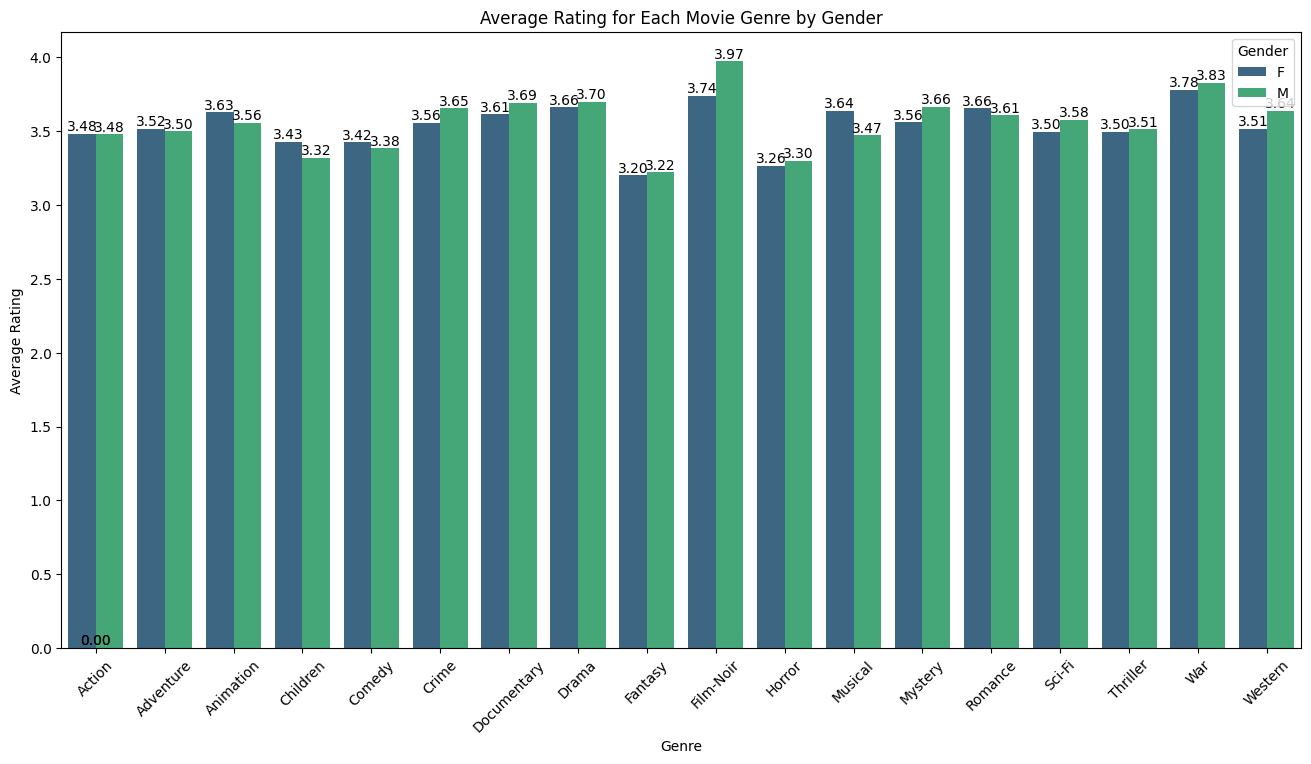

In [35]:
#Q4.Are there any significant differences in the preferences for different movie genres between male and female users?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the genre columns
genre_columns = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
                 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
                 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Melt the DataFrame to have one row per rating and genre
df_melted = df_merged.melt(id_vars=['user_id', 'gender', 'rating'], value_vars=genre_columns,
                           var_name='Genre', value_name='Is_Genre')

# Filter to keep only rows where the movie belongs to the genre
df_melted = df_melted[df_melted['Is_Genre'] == 1]

# Group by genre and gender to calculate the average rating
genre_gender_rating = df_melted.groupby(['Genre', 'gender']).rating.mean().reset_index()

# Pivot the data to have separate columns for male and female ratings
genre_gender_rating_pivot = genre_gender_rating.pivot(index='Genre', columns='gender', values='rating').reset_index()

# Melt the pivoted DataFrame for plotting
plot_data = genre_gender_rating_pivot.melt(id_vars='Genre', value_name='Average Rating', var_name='Gender')

# Plot the average rating for each genre by gender
plt.figure(figsize=(16, 8))
barplot = sns.barplot(data=plot_data, x='Genre', y='Average Rating', hue='Gender', palette="viridis")

# Add labels above each bar plot
for patch in barplot.patches:
    height = patch.get_height()  # Height of each bar
    barplot.text(
        patch.get_x() + patch.get_width() / 2,  # X-coordinate: center of the bar
        height,  # Y-coordinate: on top of the bar
        f'{height:.2f}',  # Label text: average rating with 2 decimal places
        color='black',  # Text color
        ha="center",  # Horizontal alignment: center
        va="bottom",  # Vertical alignment: bottom (just above the bar)
        fontsize=10  # Font size
    )

plt.title('Average Rating for Each Movie Genre by Gender')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


C:\Users\VANSH TOLANI\AppData\Local\Temp\ipykernel_15476\1421374877.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_ratings_by_gender, x='gender', y='Number of Ratings', palette="viridis")


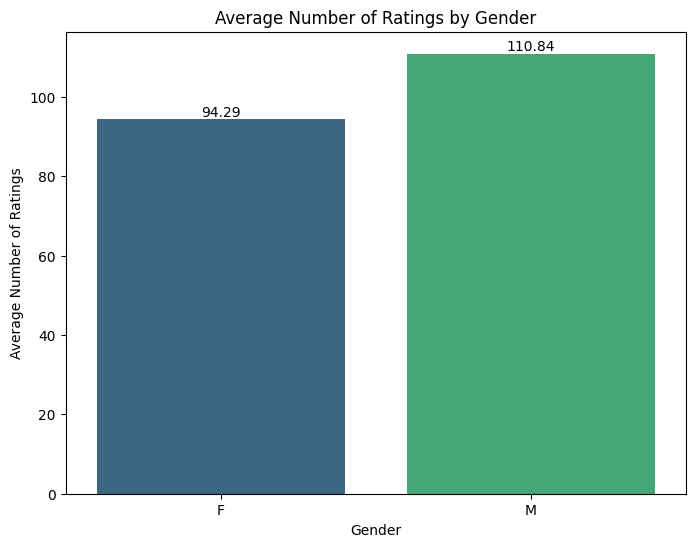

In [38]:
#Q5,Do male or female users rate more movies on average?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by user_id and gender to count the number of ratings per user
user_rating_counts = df_merged.groupby(['user_id', 'gender']).size().reset_index(name='Number of Ratings')

# Group by gender to calculate the average number of ratings
avg_ratings_by_gender = user_rating_counts.groupby('gender')['Number of Ratings'].mean().reset_index()

# Plot the average number of ratings by gender
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_ratings_by_gender, x='gender', y='Number of Ratings', palette="viridis")

# Add labels on top of each bar indicating the average number of ratings
for index, row in avg_ratings_by_gender.iterrows():
    plt.text(
        index,  # X-coordinate: position of the bar
        row['Number of Ratings'] + 0.1,  # Y-coordinate: just above the top of the bar
        f'{row["Number of Ratings"]:.2f}',  # Label text: average number of ratings with 2 decimal places
        color='black',  # Text color
        ha="center",  # Horizontal alignment: center
        va="bottom",  # Vertical alignment: bottom (just above the bar)
        fontsize=10  # Font size
    )

plt.title('Average Number of Ratings by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Number of Ratings')
plt.show()

avg_ratings_by_gender = user_rating_counts.groupby('gender')['Number of Ratings'].mean().reset_index()




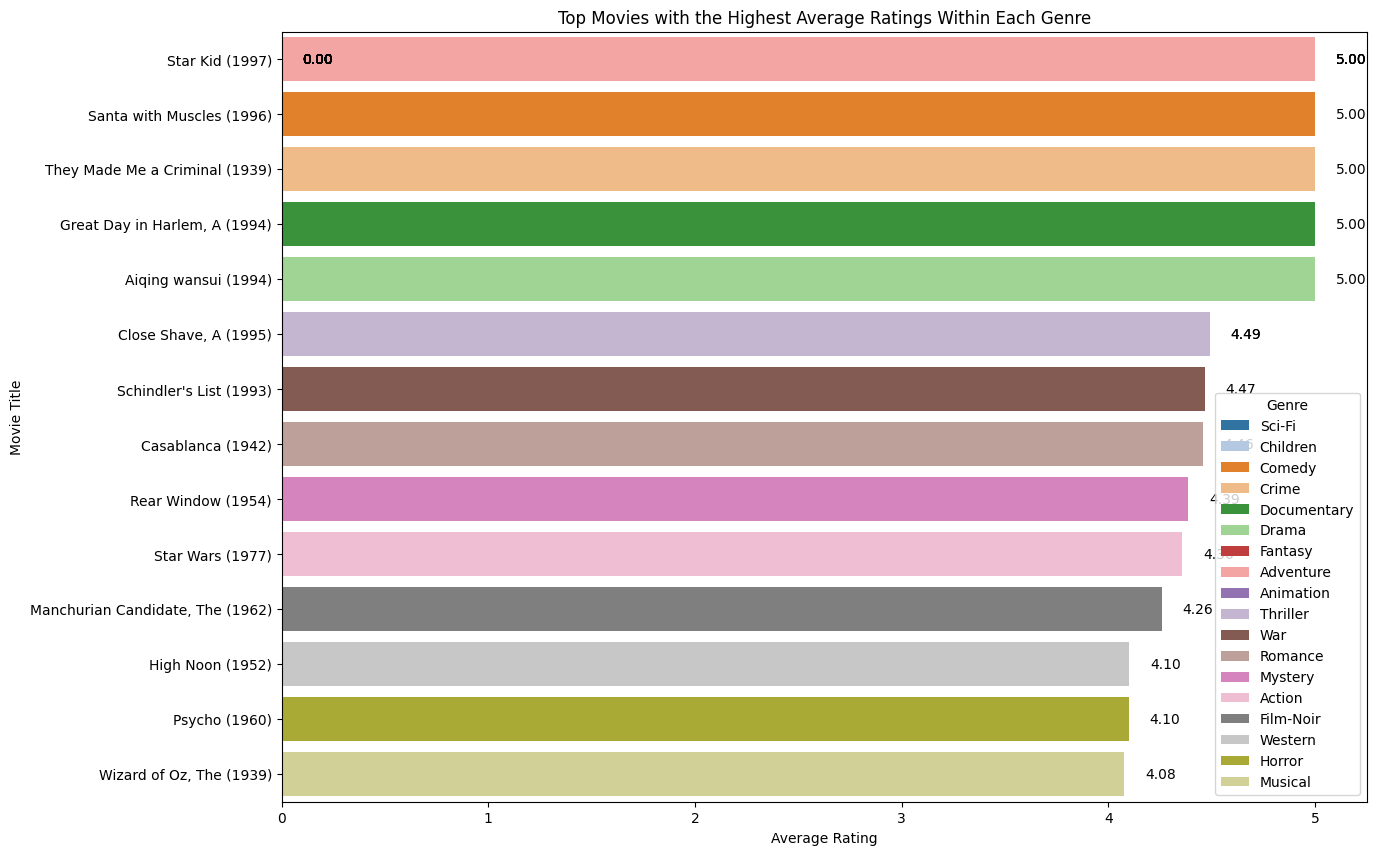

In [42]:
#Q6.Which movies have the highest average ratings within each genre?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the genre columns
genre_columns = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
                 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
                 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Melt the DataFrame to get a row per movie and genre
df_melted = df_merged.melt(id_vars=['title', 'rating'], value_vars=genre_columns,
                           var_name='Genre', value_name='Is_Genre')

# Filter to keep only rows where the movie belongs to the genre
df_melted = df_melted[df_melted['Is_Genre'] == 1]

# Group by genre and movie title to calculate the average rating
genre_movie_avg_rating = df_melted.groupby(['Genre', 'title']).rating.mean().reset_index()

# Find the top movie by average rating for each genre
top_movies_per_genre = genre_movie_avg_rating.loc[genre_movie_avg_rating.groupby('Genre')['rating'].idxmax()]

# Sort the DataFrame by average rating
top_movies_per_genre = top_movies_per_genre.sort_values(by='rating', ascending=False)

# Plot the top movies for each genre
plt.figure(figsize=(14, 10))
ax = sns.barplot(data=top_movies_per_genre, x='rating', y='title', hue='Genre', palette='tab20', dodge=False)

# Add labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width() + 0.1, p.get_y() + p.get_height() / 2),
                va='center', ha='left', fontsize=10, color='black')

plt.title('Top Movies with the Highest Average Ratings Within Each Genre')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.legend(title='Genre')
plt.show()



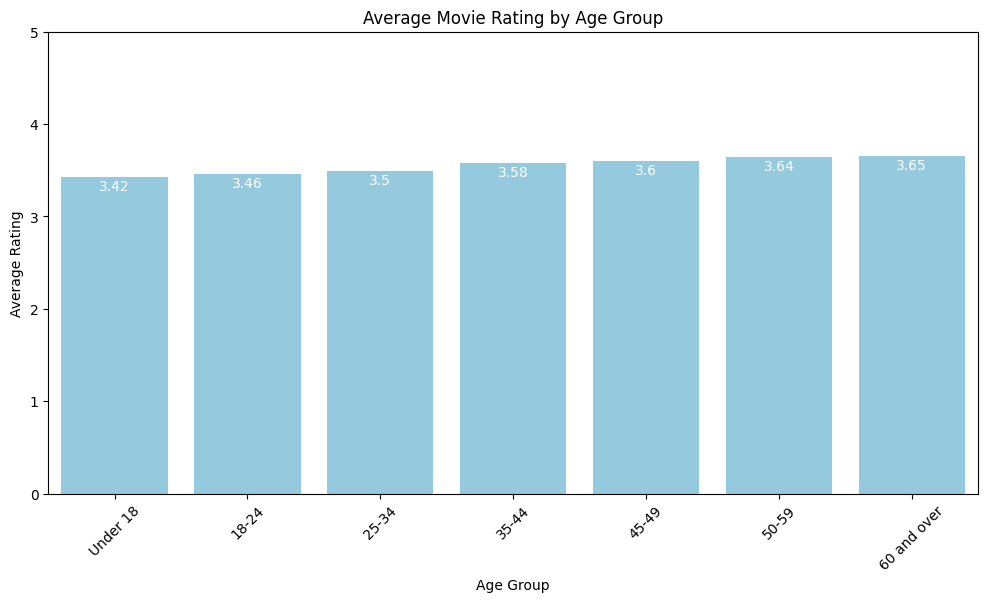

In [43]:
#Q7.How do ratings vary across different user age groups?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define age groups
bins = [0, 18, 24, 34, 44, 49, 59, 100]
labels = ['Under 18', '18-24', '25-34', '35-44', '45-49', '50-59', '60 and over']
df_merged['age_group'] = pd.cut(df_merged['age'], bins=bins, labels=labels, right=False)

# Calculate average rating by age group
age_group_rating = df_merged.groupby('age_group')['rating'].mean().reset_index()

# Plot the average rating by age group
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=age_group_rating, x='age_group', y='rating', color="skyblue")

# Add exact rating values inside each bar
for index, row in age_group_rating.iterrows():
    barplot.text(index, row['rating'] - 0.1, round(row['rating'], 2), color='white', ha="center", va='center')

plt.title('Average Movie Rating by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.ylim(0, 5)  # Optionally set y-axis limits if needed
plt.show()



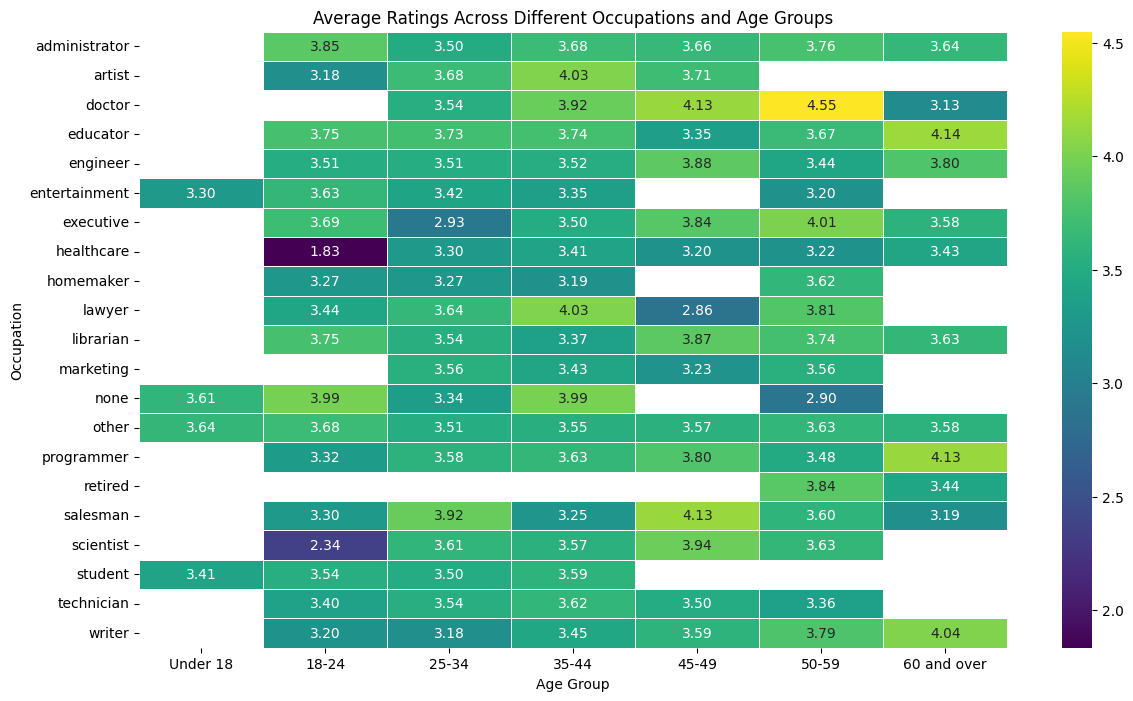

In [71]:
#Q8.How do ratings vary across different user occupations?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame - replace with your actual DataFrame
# df_merged = pd.read_csv('your_file.csv')  # Uncomment and replace with your actual data loading

# Pivot the data for heatmap
heatmap_data = df_merged.pivot_table(index='occupation', columns='age_group', values='rating', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap="viridis", annot=True, fmt=".2f", linewidths=.5)

plt.title('Average Ratings Across Different Occupations and Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Occupation')
plt.show()





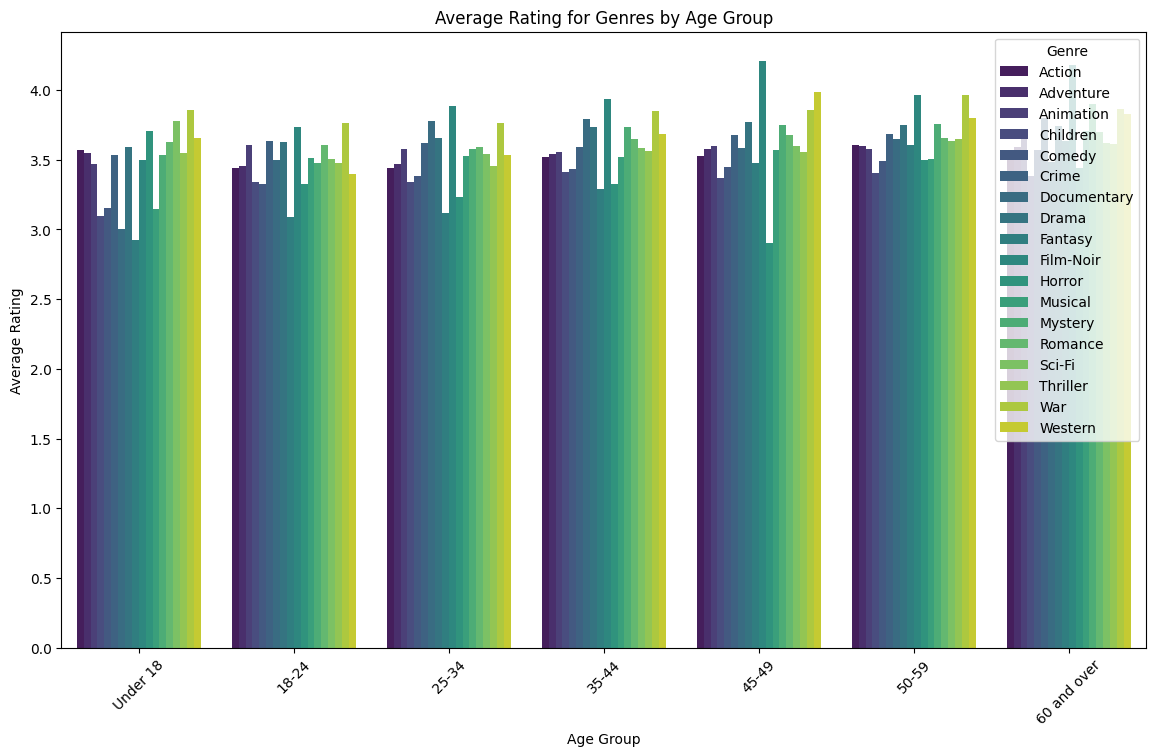

In [62]:
#Q9,Which genres are preferred by different age groups?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame - replace with your actual DataFrame
# df_merged = pd.read_csv('your_file.csv')  # Uncomment and replace with your actual data loading

# Define bins and labels for age groups
bins = [0, 18, 24, 34, 44, 49, 59, 100]
labels = ['Under 18', '18-24', '25-34', '35-44', '45-49', '50-59', '60 and over']
df_merged['age_group'] = pd.cut(df_merged['age'], bins=bins, labels=labels, right=False)

# Melt the DataFrame to get a row per movie and genre
df_melted = df_merged.melt(id_vars=['age_group', 'title', 'rating'], value_vars=genre_columns,
                           var_name='Genre', value_name='Is_Genre')

# Filter to keep only rows where the movie belongs to the genre
df_melted = df_melted[df_melted['Is_Genre'] == 1]

# Group by age group and genre to calculate average rating
age_genre_rating = df_melted.groupby(['age_group', 'Genre'])['rating'].mean().reset_index()

# Plot the grouped bar chart
plt.figure(figsize=(14, 8))
sns.barplot(data=age_genre_rating, x='age_group', y='rating', hue='Genre', palette="viridis")

plt.title('Average Rating for Genres by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.legend(title='Genre')
plt.show()



In [90]:
#Q10.How do user preferences evolve over time? Can we observe any shifts in genre popularity?

# Check data types
print(time_genre_pivot.dtypes)

# Inspect the data for non-numeric values
print(time_genre_pivot.head())



Genre
Action         int64
Adventure      int64
Animation      int64
Children       int64
Comedy         int64
Crime          int64
Documentary    int64
Drama          int64
Fantasy        int64
Film-Noir      int64
Horror         int64
Musical        int64
Mystery        int64
Romance        int64
Sci-Fi         int64
Thriller       int64
War            int64
Western        int64
dtype: object
Genre       Action  Adventure  Animation  Children  Comedy  Crime  \
year_month                                                          
1970-01      25589      13753       3605      7182   29832   8055   

Genre       Documentary  Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  \
year_month                                                                     
1970-01             758  39895     1352       1733    5317     4954     5245   

Genre       Romance  Sci-Fi  Thriller   War  Western  
year_month                                            
1970-01       19461   12730     21872  9398

In [91]:
# Convert columns to numeric and handle non-numeric values
time_genre_pivot = time_genre_pivot.apply(pd.to_numeric, errors='coerce')

# Check for any remaining non-numeric values
print(time_genre_pivot.isna().sum())


Genre
Action         0
Adventure      0
Animation      0
Children       0
Comedy         0
Crime          0
Documentary    0
Drama          0
Fantasy        0
Film-Noir      0
Horror         0
Musical        0
Mystery        0
Romance        0
Sci-Fi         0
Thriller       0
War            0
Western        0
dtype: int64


Genre       Action  Adventure  Animation  Children  Comedy  Crime  \
year_month                                                          
1970-01      25589      13753       3605      7182   29832   8055   

Genre       Documentary  Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  \
year_month                                                                     
1970-01             758  39895     1352       1733    5317     4954     5245   

Genre       Romance  Sci-Fi  Thriller   War  Western  
year_month                                            
1970-01       19461   12730     21872  9398     1854  


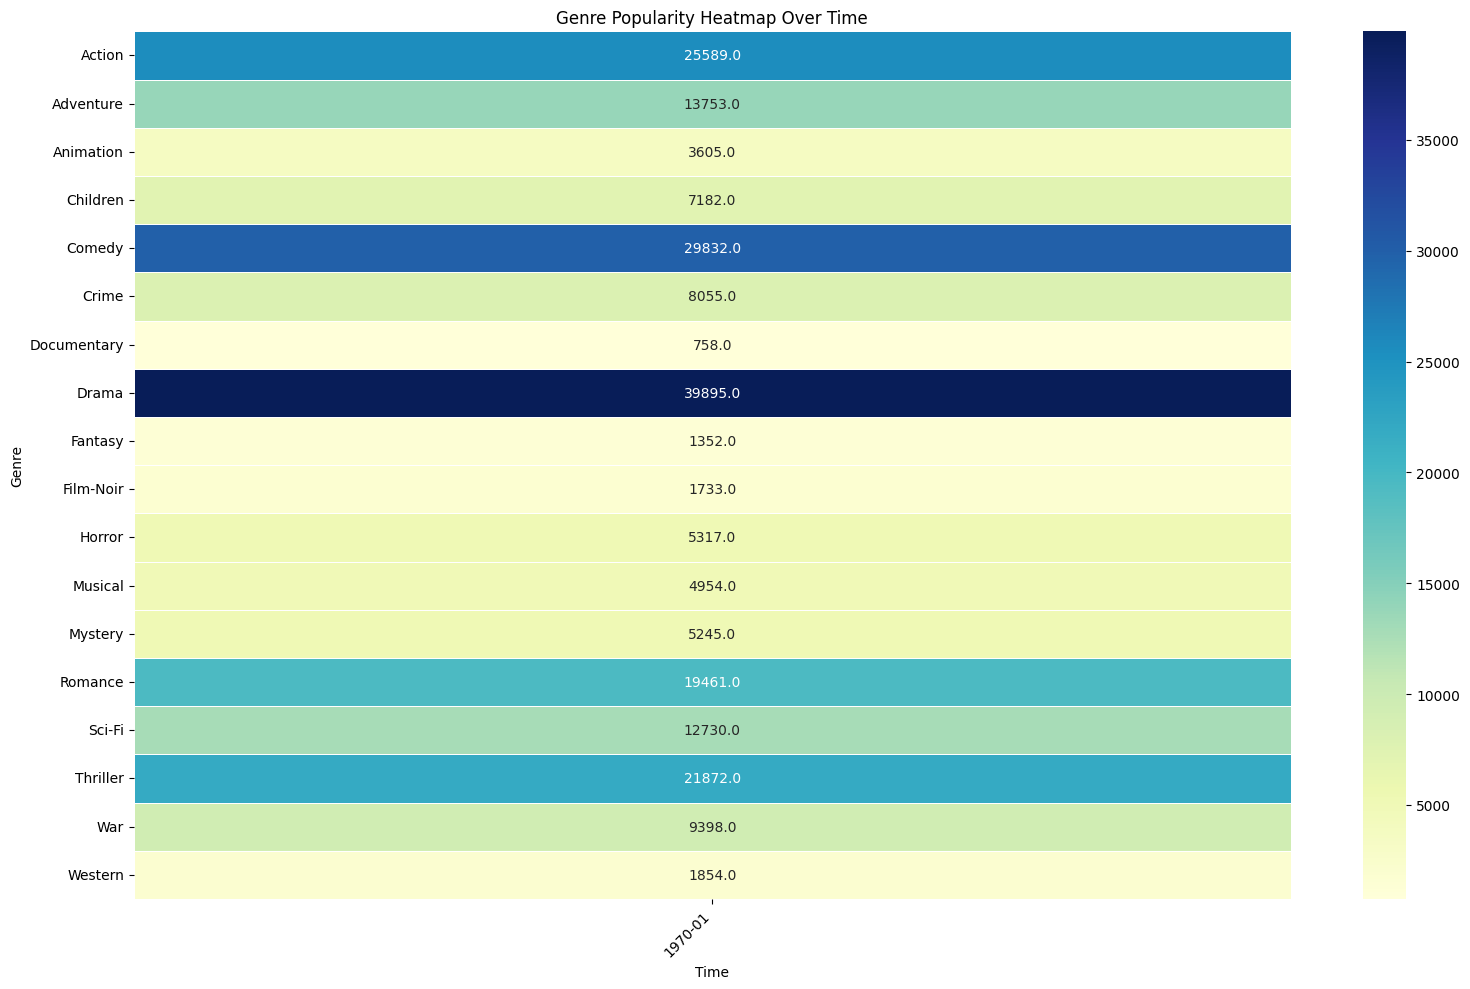

In [93]:
#Q10.How do user preferences evolve over time? Can we observe any shifts in genre popularity?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame setup (replace with your actual DataFrame and data)
# df_merged = pd.read_csv('your_file.csv')  # Uncomment and replace with your actual data loading

# Ensure the timestamp is in datetime format
df_merged['timestamp'] = pd.to_datetime(df_merged['timestamp'])

# Extract year and month for time-based aggregation
df_merged['year_month'] = df_merged['timestamp'].dt.to_period('M')

# Define the genre columns, excluding 'unknown'
genre_columns = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
                 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
                 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Melt the DataFrame to get a row per movie and genre
df_melted = df_merged.melt(id_vars=['year_month', 'title', 'rating'], value_vars=genre_columns,
                           var_name='Genre', value_name='Is_Genre')

# Filter to keep only rows where the movie belongs to the genre
df_melted = df_melted[df_melted['Is_Genre'] == 1]

# Group by year_month and genre to calculate the number of ratings (popularity) per genre
genre_popularity = df_melted.groupby(['year_month', 'Genre']).size().reset_index(name='Count')

# Pivot the data for heatmap
time_genre_pivot = genre_popularity.pivot(index='year_month', columns='Genre', values='Count').fillna(0)

# Check the structure of the pivot table
print(time_genre_pivot.head())

import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the pivot table is created with 'year_month' as columns and 'Genre' as rows
time_genre_pivot = genre_popularity.pivot(index='Genre', columns='year_month', values='Count').fillna(0)

# Plot heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(time_genre_pivot, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5)
plt.title('Genre Popularity Heatmap Over Time')
plt.xlabel('Time')
plt.ylabel('Genre')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

